# Pulsar Stars

Sebelum memasuki eksplorasi data pertama akan dijelaskan beberapa hal mengenai pulsar stars. *Pulsar stars* sendiri merupakan bintang neutron yang langka, bintang neutron ini dapat memancarkan emisi sampai ke bumi. Dalam ekplorasi ini, saya akan mencoba mencari perbedaan antara pulsar stars dengan radio frequency inference (RFI) dan noise.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

RANDOM_STATE = 1337
np.random.seed(RANDOM_STATE)

In [3]:
df = pd.read_csv('../content/gdrive/My Drive/Colab Notebooks/Dataset/pulsar_stars.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


*Integrated profile* merupakan sinyal yang dipancarkan *pulsar stars* itu sendiri dalam periode tertentu. Dalam dataset ini ditampilkan rata rata, standart deviasi, skewness dan kurtosis untuk *integrated profile* setiap *pulsar stars*.

Sedangkan DM-SNR Curve merupakan curve yang terbentuk dari *Dispersion Measure* (DM) untuk sumbu X dan *Signal to Noise Ratio* (SNR) untuk sumbu Y yang berisikan rangkuman dari kedua pengukuran tersebut.

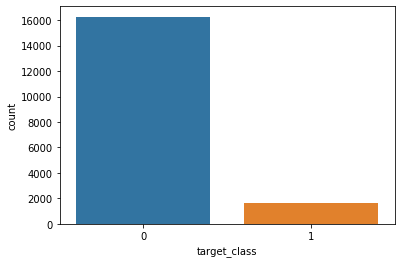

In [4]:
sns.countplot(df['target_class'])

Karena *pulsar stars* sendiri merupakan bintang neutron yang langka, dalam data ini pun data untuk kelas *pulsar stars* (1) tidak sebanyak RFI/noise (0). Untuk membuat *summary statistic*-nya mudah untuk di analisa dan lebih masuk akal untuk dibandingkan antar kelasnya, saya melakukan *down-sampling*.

In [0]:
pulsar_stars = df[df['target_class']==1]
not_pulsar = df[df['target_class']==0][0:1639]

## Summary Statistics

Dalam bagian ini akan dianalisa sifat pulsar stars melalui summary statistic dari rata rata integrated profile dan DM-SNR curve.

In [6]:
pulsar_stars.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.0
mean,56.690608,38.710598,3.130655,15.553576,49.825995,56.468963,2.757069,17.931728,1.0
std,30.007707,8.033614,1.872861,13.997200,45.287932,19.731080,3.105945,50.896263,0.0
min,5.812500,24.772042,-0.094888,-1.139069,0.486622,7.658623,-1.862320,-1.874683,1.0
25%,31.777344,32.284803,1.556038,3.805492,12.759615,43.333643,0.756451,-0.228294,1.0
50%,54.296875,37.341297,2.961258,11.609644,33.494983,59.367088,1.918327,2.585145,1.0
75%,79.277344,43.759278,4.586930,24.881853,78.313545,70.985965,3.709978,13.469687,1.0
max,139.257812,83.796909,8.069522,68.101622,199.577759,109.655345,30.883882,1017.383180,1.0


In [7]:
not_pulsar.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.0
mean,116.632493,47.461005,0.207579,0.361376,5.636830,21.547571,9.059766,114.650224,0.0
std,17.567884,6.496746,0.313693,0.941482,14.876881,13.047751,3.938822,106.328501,0.0
min,59.351562,31.483750,-1.137013,-1.676724,0.289298,7.448817,-2.556795,-1.766947,0.0
25%,105.039062,43.449562,0.009558,-0.246009,1.863294,14.288531,6.832902,51.509694,0.0
50%,117.539062,47.504959,0.186862,0.115755,2.637960,17.551967,8.765388,90.150073,0.0
75%,128.613281,51.538948,0.390245,0.686386,3.993729,23.338494,10.936706,145.885226,0.0
max,171.835938,86.951396,1.536309,6.575053,211.948997,101.090779,33.489755,1140.353233,0.0


Dari hasil summary statistic nilai integrated profile dari pulsar stars lebih kecil dengan RFI/noise. Namun antara nilai integrated profile satu dengan lainnya memiliki rata rata yang lebih bervariasi dibandingkan RFI/noise hal ini mungkin juga timbul karena pulsar star yang diamati terlalu sedikit.

Standart deviasi dari integrated profile RFI/noise dan pulsar stars cenderung sama, oleh sebab itu terkadang RFI/noise terkadang menjadi kandidat dari pulsar stars.

Sedangkan untuk nilai excess kurtosis dari integrated profile pulsar stars, menunjukan rata ratanya lebih besar pulsar stars dibandingkan dengan RFI/noise, hal ini menunjukan bahwa pancaran sinyal pulsar stars lebih kuat dibandingkan dengan RFI/noise.



## Korelasi antar atribut

Beberapa grafik dibawah merupakan grafik yang menunjukan korelasi antar atribut yang dapat menjadi analisa tersendiri.

In [0]:
x_df=df.drop(['target_class'],axis=1)
#normalization
X=(x_df-np.min(x_df))/(np.max(x_df)-np.min(x_df))
y = df.target_class

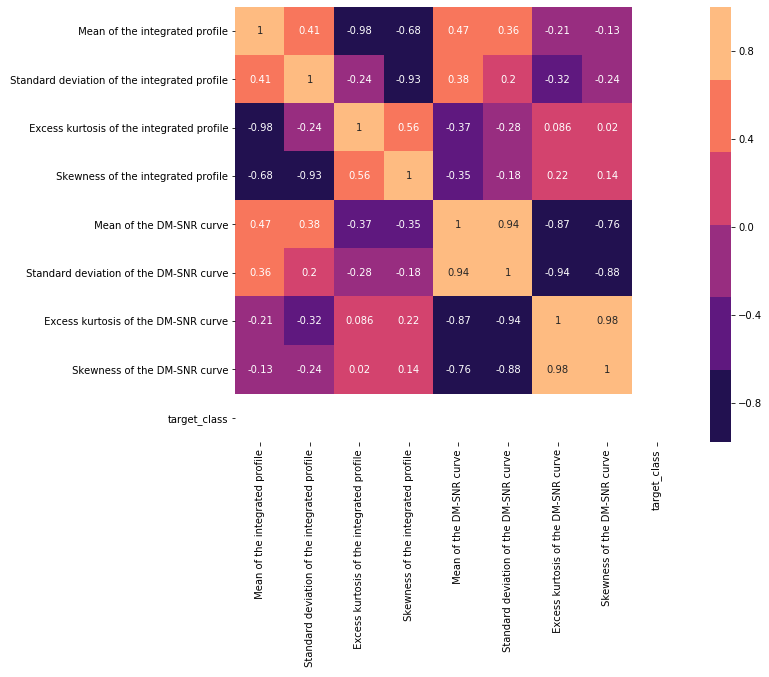

In [11]:
corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap=sns.color_palette("magma"), annot=True)

Dari pasangan nilai diatas, saya mencoba menganalisa beberapa yang nilainya mendekati 1 dan -1. Sehingga kita dapat sedikit mengetahui sifat pulsar stars yang diamati.

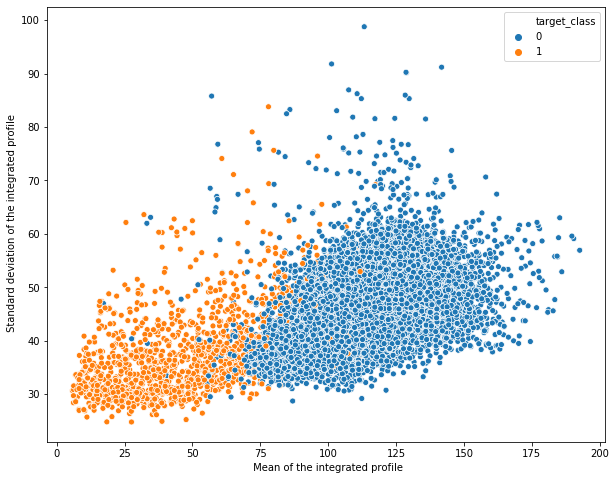

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(" Mean of the integrated profile", " Standard deviation of the integrated profile", data=df, hue='target_class')

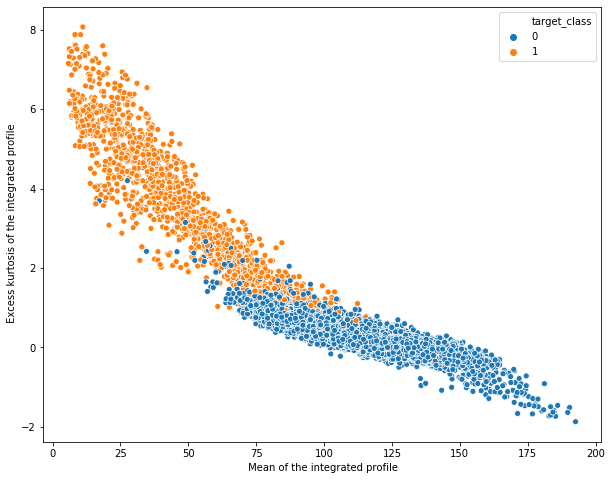

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(" Mean of the integrated profile", " Excess kurtosis of the integrated profile", data=df, hue='target_class')

Dari kedua grafik diatas yang dapat diamati adalah semakin besar nilai rata rata dari sinyal longitude yang dihasilkan oleh pulsar stars maka variasi dari sinyal yang dipancarkan juga akan semakin bervariasi. Namun pengaruh variasi sinyal yang dipancarkan ini tidak terlalu berpengaruh terhadap rata rata yang dihasilkan. Karena jika dilihat dari grafik yang kedua, semakin besar nilai rata rata dari sinyal yang dihasilkan oleh pulsar stars maka puncak dari distribusi dari sinyal yang dipancarkan juga akan semakin kecil. Hal ini berarti semakin besar nilai rata ratanya, distribusi antar sinyalnya dalam periode rotasi yang akan berubah ubah secara lebih stabil.

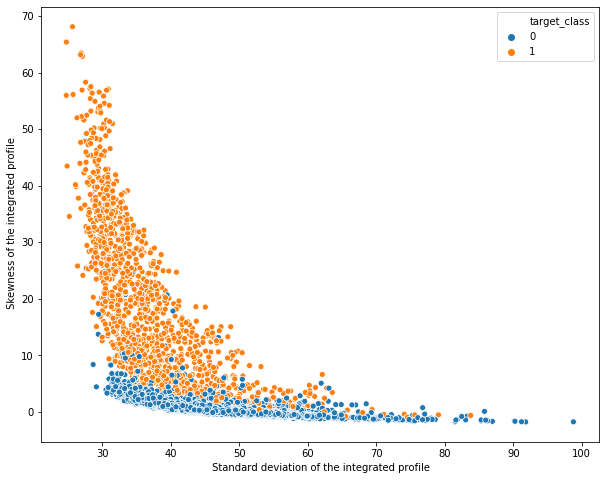

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(" Standard deviation of the integrated profile", " Skewness of the integrated profile", data=df, hue='target_class')

Dari grafik diatas yang dapat diamati adalah, semakin luas variasi sinyal yang dihasilkan oleh integrated profile dari pulsar stars semakin sinyal yang dipancarkan akan cenderung lebih kecil untuk setiap periode rotasi. Sedangkan untuk rata rata RFI/noise, nilai sinyal yang dihasilkan lebih stabil, tidak ada kecenderungan nilai ke satu arah (lebih positif atau negatif)

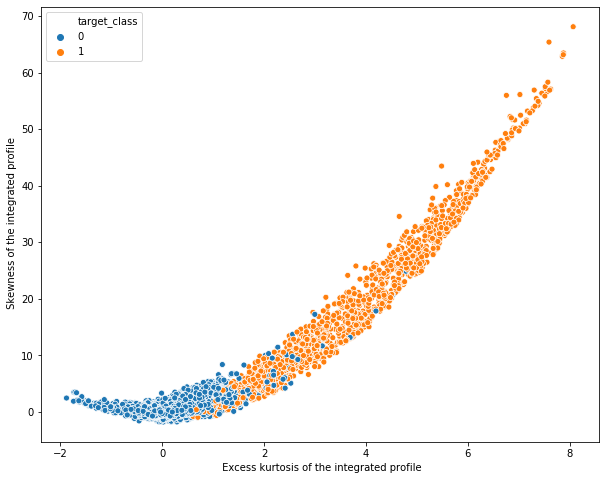

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(" Excess kurtosis of the integrated profile", " Skewness of the integrated profile", data=df, hue='target_class')

Nilai sinyal pulsar stars semakin terpusat ke nilai yang positif semakin banyak distribusi untuk nilai rata rata signal longitudenya tinggi artinya pulsar stars lebih cenderung memancarkan sinyal yang memiliki emisi yang tinggi lebih sering daripada RFI/noise.

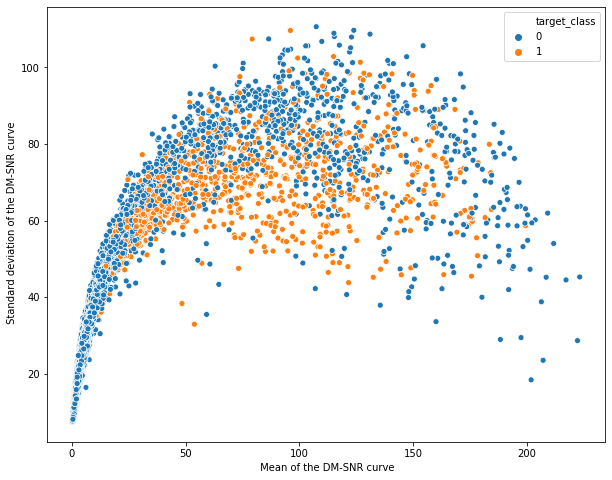

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(" Mean of the DM-SNR curve", " Standard deviation of the DM-SNR curve", data=df, hue='target_class')

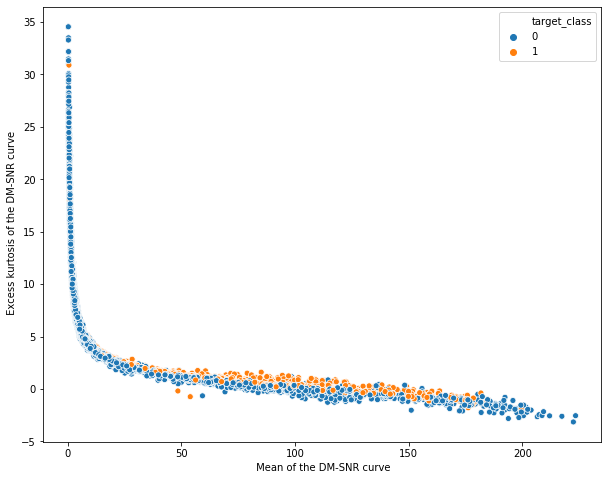

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(" Mean of the DM-SNR curve", " Excess kurtosis of the DM-SNR curve", data=df, hue='target_class')

Dalam mengukur perbandingan menggunakan DM-SNR curve cukup sulit melihat keunikan untuk tiap atribut yang berkolerasi baik untuk kelas pulsar stars maupun RFI/noise. karena persebaran keduanya tidak condong ke satu arah.

## Klasifikasi Pulsar Stars

Bagian ini melakukan klasifikasi terhadap data pulsar stars. Hal ini dilakukan untuk melihat apakah klasifikasi yang digunakan dengan data yang tidak seimbang, hasilnya akan tepat. Namun sebelumnya saya akan membagi data menjadi dua bagian yaitu train dan test.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =RANDOM_STATE)

### Decision Tree

Klasifikasi yang digunakan adalah Decision Tree. Alasan digunakan algoritma ini adalah, dikebanyakan percobaan pada kaggle mendapatkan hasil akurasi yang sangat tinggi. Namun hal tersebut bisa saja salah, sehingga pada penelitian ini saya akan menghitung recall dan precision nya untuk melihat apakah algoritma ini benar benar bagus atau data yang tidak seimbang menguntungkan algoritma ini?

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

dtree = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_features= 8, min_samples_leaf= 5)
model = dtree.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)

print(acc, rec, pre)

0.9783985102420857 0.8336980306345733 0.9049881235154394


Algoritma yang digunakan menggunakan gini untuk menghitung kemurnian dari tiap cabang. Sedangkan kedalaman maksimal dibatasi hanya sampai 5 aras. Untuk feature yang dipertimbangkan dalam pengambilan keputusan adalah semua atribut pada data kecuali target_class.

Text(91.68, 0.5, 'predicted label')

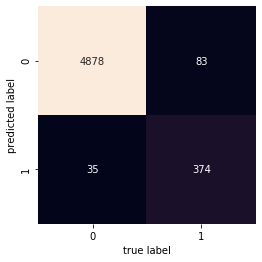

In [0]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Confusion matrix ini semakin menyakinkan jika decision tree menghasilkan nilai yang bagus untuk dataset ini, walaupun datanya tidak seimbang.


Klasifikasi dengan menggunakan Decision Tree ini banyak dipilih karena untuk mengelompokan data, algoritma ini memiliki beberapa 'referensi' artinya sebelum memilih hasil yang terbaik untuk data tersebut, algoritma ini melakukan beberapa pertimbangan. Pertimbangan ini salalh satunya berupa kemurnian atau bisa dibilang dengan expected value dari susunan pohon. Susunan pohon yang hasilnya lebih menguntungkan akan dipilih.